In [1]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip


--2020-07-07 12:11:56--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  86.8MB/s    in 0.8s    

2020-07-07 12:11:57 (86.8 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


In [3]:
zip_file=zipfile.ZipFile('/tmp/cats_and_dogs_filtered.zip','r')


In [4]:
zip_file.extractall('/tmp/cats_dogs')
zip_file.close()

In [5]:
path=os.path.join('/tmp/cats_dogs/cats_and_dogs_filtered')

In [6]:
path

'/tmp/cats_dogs/cats_and_dogs_filtered'

In [7]:
os.listdir(path)

['vectorize.py', 'train', 'validation']

In [8]:
train_path=os.path.join(path,'train')
test_path=os.path.join(path,'validation')

In [9]:
train_path

'/tmp/cats_dogs/cats_and_dogs_filtered/train'

In [10]:
os.listdir(train_path)

['dogs', 'cats']

In [11]:
sample_path=os.path.join(train_path,'cats')
sample_1=os.path.join(train_path,'dogs')

In [12]:
sample_path=os.path.join(sample_path,'cat.472.jpg')

In [13]:
#os.listdir(sample_1)
sample_2=os.listdir(sample_1)
len(sample_2)

1000

In [14]:
sample_path

'/tmp/cats_dogs/cats_and_dogs_filtered/train/cats/cat.472.jpg'

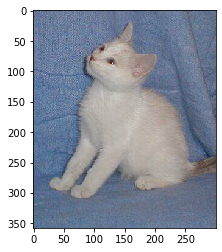

In [15]:
plt.imshow(plt.imread(sample_path))

In [16]:
#image Data Generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
img_gen=ImageDataGenerator(rescale=1/255)

In [18]:
train_gen=img_gen.flow_from_directory(train_path,target_size=(200,200),
                                      batch_size=20,
                                      class_mode='binary',
                                      shuffle=True)

Found 2000 images belonging to 2 classes.


In [19]:
test_gen=img_gen.flow_from_directory(test_path,target_size=(200,200),
                                     batch_size=20,
                                     class_mode='binary')

Found 1000 images belonging to 2 classes.


In [20]:
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout

In [21]:
model=keras.Sequential()
model.add(Conv2D(filters=32,kernel_size=(2,2),strides=(1,1),input_shape=(200,200,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(2,2),strides=(1,1),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.3))
model.add(Conv2D(filters=128,kernel_size=(2,2),strides=(1,1),activation='relu',padding='SAME'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.0001),loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 128)       32896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 128)       0

In [ ]:
model.fit(train_gen,epochs=50,validation_data=(test_gen),steps_per_epoch=100,validation_steps=50)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/50
100/100 [==============================] - 84s 838ms/step - loss: 0.6946 - accuracy: 0.5045 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/50
100/100 [==============================] - 80s 795ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/50
100/100 [==============================] - 80s 802ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/50
100/100 [==============================] - 80s 799ms/step - loss: 0.6931 - accuracy: 0.4990 - val_loss: 0.6954 - val_accuracy: 0.5040
Epoch 5/50
100/100 [==============================] - 80s 803ms/step - loss: 0.6931 - accuracy: 0.5020 - val_loss: 0.6929 - val_accuracy: 0.5010
Epoch 6/50
100/100 [==============================] - 79s 786ms/step - loss: 0.6926 - accuracy: 0.5025 - val_loss: 0.6930 - val_accuracy: 0.5010
Epoch 7/50
100/100 [=================

In [ ]:
metrics=model.history.history
loss=metrics['loss']
val_loss=metrics['val_loss']
acc=metrics['accuracy']
val_acc=metrics['val_accuracy']

In [ ]:
plt.plot(loss)
plt.plot(val_loss)

In [ ]:
plt.plot(acc)
plt.plot(val_acc)

In [ ]:
#### Lets see some intermediate results using model
layers=model.layers

In [ ]:
### Lets take the output of every layer and store it in list
### Exclusing the first layer because we will send the first layer as input. That comes under input
output_layer=[layer.output for layer in layers[1:]]

In [ ]:
output_layer

In [ ]:
## Now we will define what should be the model like what are the input parameters and what should be the output parameter
## This will create a class
visualize_layers=keras.models.Model(inputs=model.input,outputs=output_layer)

In [ ]:
visualize_layers

In [ ]:
sample_image=plt.imread(sample_path)

In [ ]:
sample_image.shape

In [ ]:
plt.imshow(sample_image)

In [ ]:
## Now let visualise the various features from different layers of the model
import cv2
sample_image=cv2.imread(sample_path)

In [ ]:
sample_image=cv2.resize(sample_image,(200,200))

In [ ]:
sample_image.shape

In [ ]:
sample_image=sample_image.reshape((-1,200,200,3))

In [ ]:
### NOw lets generate feature maps
feature_maps=visualize_layers.predict(sample_image)

In [ ]:
### Each value in the list corresponds each layer
len(feature_maps)

In [ ]:
## If we see each layer it has images equal to num of dimensions
feature_maps[1].shape

In [ ]:
#lets plot one
sample_output=feature_maps[1].reshape(100,100,64)


In [ ]:
sample_output.shape

In [ ]:
## Lets take one image from these 64 images(features)
feature_image=sample_output[:,:,55]

In [ ]:
plt.imshow(feature_image)

In [ ]:
### Now we will take 5th layer and some feature
feature_image=feature_maps[4].reshape((50,50,128))

In [ ]:
feature_output=feature_image[:,:,123]

In [ ]:
plt.imshow(feature_output)